In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_csv("loan_approval_data.csv")
df.sample(2)

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
47,48.0,5943.0,1386.0,Salaried,38.0,Married,1.0,578.0,1.0,0.27,6806.0,41170.0,34894.0,12.0,Business,Urban,Graduate,Female,Private,No
416,417.0,7073.0,116.0,Self-employed,NaN,Married,3.0,554.0,2.0,0.44,1079.0,38459.0,25187.0,84.0,Business,Urban,Graduate,Female,Government,No


In [47]:
df.shape

(1000, 20)

In [48]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [50]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


# Missing Values

In [51]:
# Numerical and Categorical Mean, Mode

categorical_cols = df.select_dtypes(include=["object"]).columns
nume_cols = df.select_dtypes(include=["float64"]).columns

In [52]:
categorical_cols
nume_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [53]:
from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(strategy='mean') 
df[nume_cols] = num_imp.fit_transform(df[nume_cols])

In [54]:
df.isnull().sum()

Applicant_ID           0
Applicant_Income       0
Coapplicant_Income     0
Employment_Status     50
Age                    0
Marital_Status        50
Dependents             0
Credit_Score           0
Existing_Loans         0
DTI_Ratio              0
Savings                0
Collateral_Value       0
Loan_Amount            0
Loan_Term              0
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [55]:
cate_imp = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cate_imp.fit_transform(df[categorical_cols])

In [56]:
df.sample()
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

# EDA

<Axes: xlabel='Credit_Score', ylabel='Count'>

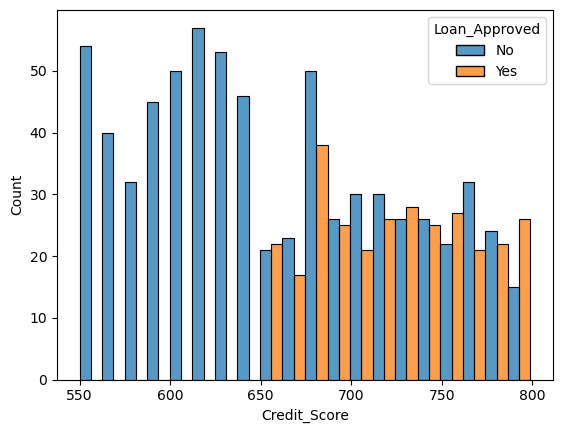

In [57]:
sns.histplot(
    data=df,
    x='Credit_Score',
    hue='Loan_Approved',
    bins=20,
    multiple='dodge'
)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

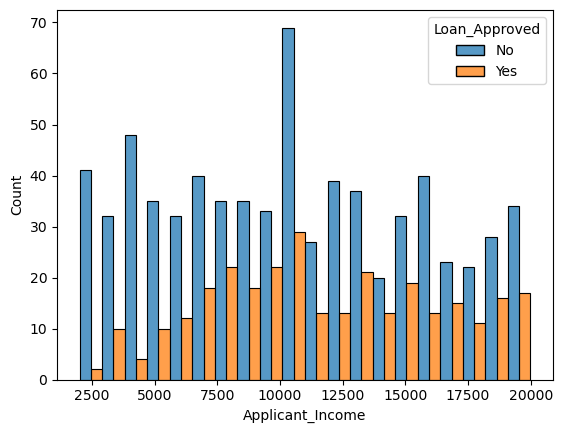

In [58]:
sns.histplot(
    data=df,
    x='Applicant_Income',
    hue='Loan_Approved',
    bins=20,
    multiple='dodge'
)

Text(0.5, 1.0, 'Loan Approved or Not')

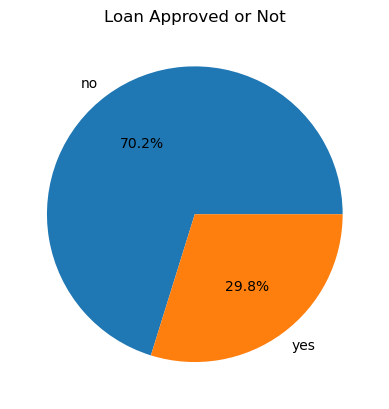

In [59]:
classes_count = df["Loan_Approved"].value_counts()
plt.pie(classes_count, labels=["no", "yes"], autopct='%1.1f%%')
plt.title("Loan Approved or Not")

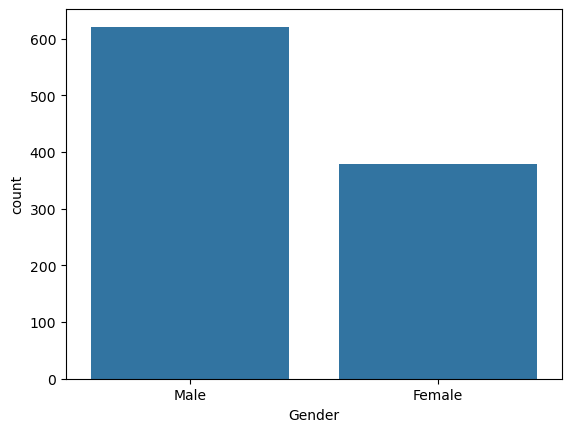

In [60]:
gen_count = df["Gender"].value_counts()
gen_bp = sns.barplot(gen_count)
# gen_bp.bar_label

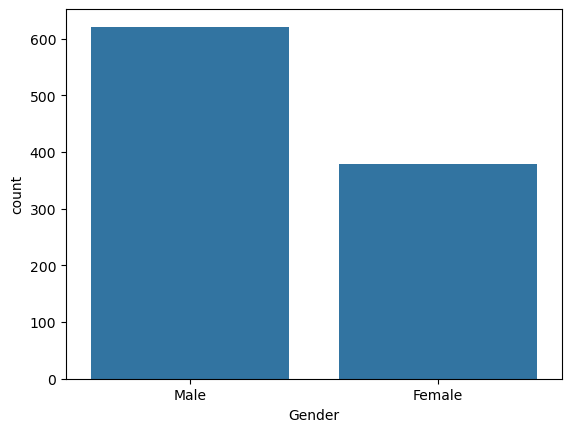

In [61]:
gradcount = df["Education_Level"].value_counts()
gen_bp = sns.barplot(gen_count)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

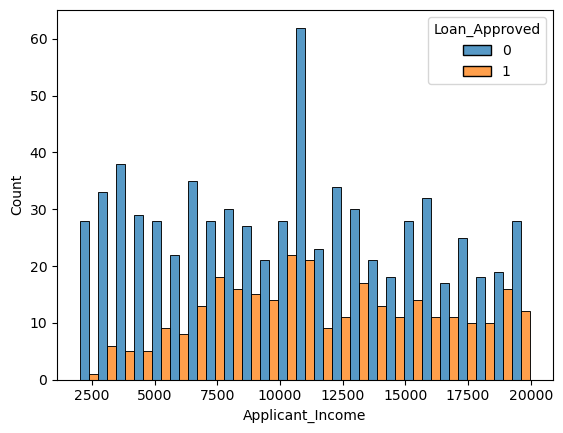

In [93]:
sns.histplot(
    data = df,
    x = "Applicant_Income",
    bins=25,
    hue = 'Loan_Approved',
    multiple='dodge'
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

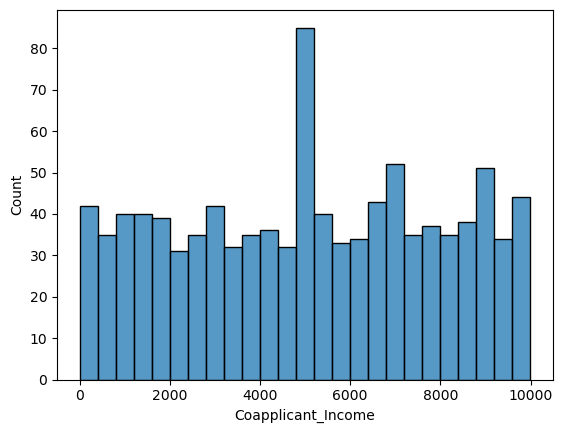

In [63]:
sns.histplot(
    data = df,
    x = "Coapplicant_Income",
    bins=25
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

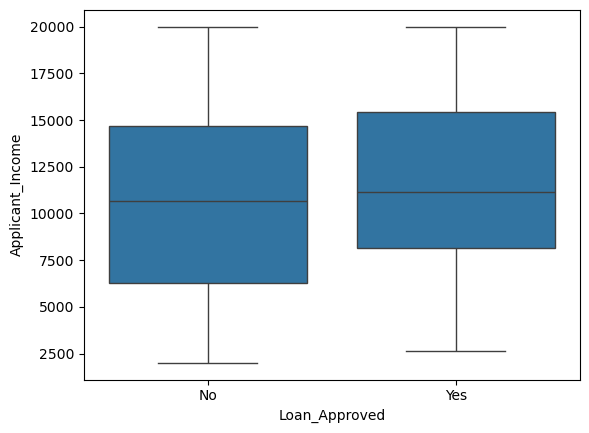

In [64]:
sns.boxplot(
    data=df,
    x = "Loan_Approved",
    y = "Applicant_Income"
)

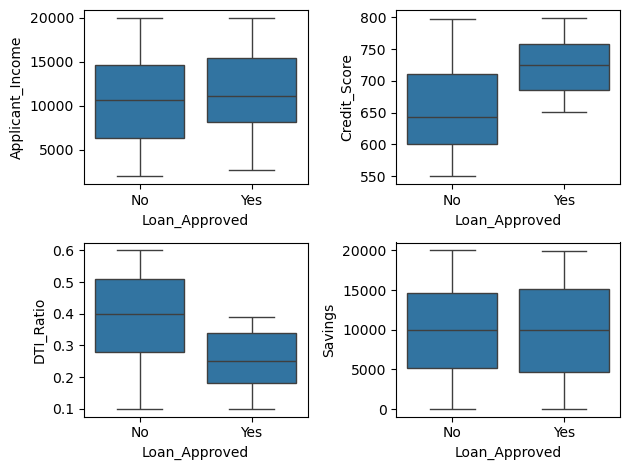

In [65]:
fig, axes = plt.subplots(2, 2)

sns.boxplot(ax=axes[0,0], data=df, x="Loan_Approved", y = "Applicant_Income")
sns.boxplot(ax=axes[0,1], data=df, x="Loan_Approved", y="Credit_Score")
sns.boxplot(ax=axes[1,0], data=df, x="Loan_Approved", y="DTI_Ratio")
sns.boxplot(ax=axes[1,1], data=df, x="Loan_Approved", y="Savings")

plt.tight_layout()

In [66]:
df = df.drop("Applicant_ID", axis=1)

In [67]:
df.sample()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
145,19082.0,4497.0,Self-employed,43.0,Single,2.0,793.0,1.0,0.13,4503.0,26962.0,1730.0,24.0,Personal,Rural,Graduate,Male,Private,Yes


# Encoding

In [68]:
# Label binary, OneHotEncoding get dummies utne new cols 0 for no and 1 for the same
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [69]:
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Loan_Approved'] = le.fit_transform(df['Loan_Approved'])
df.sample(3)

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
233,8893.0,9788.0,Contract,59.0,Married,1.474737,637.0,1.0,0.347263,9024.0,21213.0,32171.000000,72.0,Home,Urban,0,Female,Private,0
833,8371.0,2428.0,Salaried,21.0,Single,0.000000,774.0,2.0,0.120000,16243.0,10355.0,12549.000000,12.0,Business,Urban,0,Male,Business,1
38,13016.0,9900.0,Salaried,46.0,Married,3.000000,567.0,0.0,0.520000,4483.0,12807.0,20522.825263,48.0,Car,Urban,1,Male,Business,0


In [70]:
cols = ['Marital_Status', 'Loan_Purpose', 'Employment_Status', 'Property_Area', 'Gender', 'Employer_Category']

ohe = OneHotEncoder(
    drop='first',
    sparse_output=False,
    handle_unknown='ignore'
)

encoded = ohe.fit_transform(df[cols])

encoded_df = pd.DataFrame(
    encoded, 
    columns=ohe.get_feature_names_out(cols), 
    index=df.index
)

df = pd.concat([df, encoded_df], axis=1)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Employment_Status                1000 non-null   object 
 3   Age                              1000 non-null   float64
 4   Marital_Status                   1000 non-null   object 
 5   Dependents                       1000 non-null   float64
 6   Credit_Score                     1000 non-null   float64
 7   Existing_Loans                   1000 non-null   float64
 8   DTI_Ratio                        1000 non-null   float64
 9   Savings                          1000 non-null   float64
 10  Collateral_Value                 1000 non-null   float64
 11  Loan_Amount                      1000 non-null   float64
 12  Loan_Term            

In [72]:
df= df.drop(columns=cols, axis=1, errors='ignore')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Education_Level                  1000 non-null   int64  
 12  Loan_Approved        

In [74]:
df.sample(3)

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
673,7126.0,4114.0,37.0,2.0,760.0,2.0,0.11,207.0,42832.0,9712.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34,12555.0,4263.0,26.0,1.0,583.0,4.0,0.58,13411.0,43967.0,32499.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
253,19453.0,9547.0,24.0,2.0,598.0,3.0,0.48,1854.0,26844.0,39973.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


# Corrrelation Heatmap

In [77]:
num_cols = df.select_dtypes(include='number')

In [78]:
num_cols.corr()['Loan_Approved'].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                 

In [95]:
corr_matrix = num_cols.corr()


<Axes: >

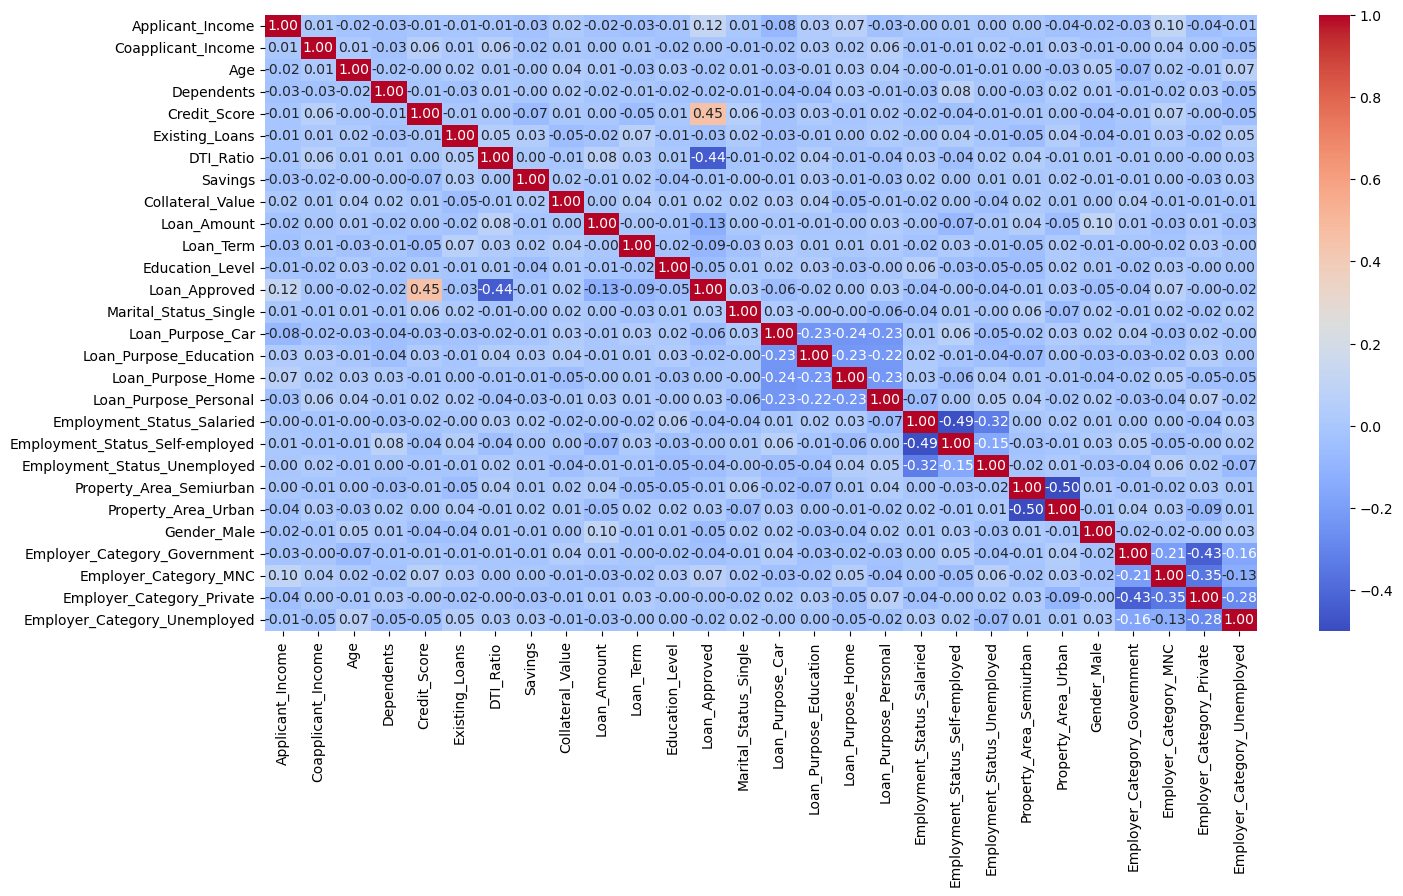

In [97]:
plt.figure(figsize=(16,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm'
)

# Training

In [81]:
X = df.drop('Loan_Approved', axis=1)
y = df['Loan_Approved']

In [82]:
X.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [83]:
# more features knn not the best one coz data points sparse

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=40
)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# precision, accuraccy, recal, f1, confusion matrix FP-Precision, FN-Recall
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy_score: ", accuracy_score(y_test, y_pred))
print("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
print("Recall_score: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))

Logistic Regression Model
Precision:  0.8333333333333334
Accuracy_score:  0.865
Confusion_matrix:  [[138   7]
 [ 20  35]]
Recall_score:  0.6363636363636364
F1_score:  0.7216494845360825


In [86]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

# precision, accuraccy, recal, f1, confusion matrix FP-Precision, FN-Recall
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy_score: ", accuracy_score(y_test, y_pred))
print("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
print("Recall_score: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))

KNN Model
Precision:  0.4791666666666667
Accuracy_score:  0.715
Confusion_matrix:  [[120  25]
 [ 32  23]]
Recall_score:  0.41818181818181815
F1_score:  0.44660194174757284


In [87]:
# knn performing worse

In [88]:
# NaiveBayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred = nb.predict(X_test_scaled)

# precision, accuraccy, recal, f1, confusion matrix FP-Precision, FN-Recall
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy_score: ", accuracy_score(y_test, y_pred))
print("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
print("Recall_score: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))

Naive Bayes Model
Precision:  0.9
Accuracy_score:  0.885
Confusion_matrix:  [[141   4]
 [ 19  36]]
Recall_score:  0.6545454545454545
F1_score:  0.7578947368421053


Precision k lia Best Model = Naive Bayes Best

# Feature Engineering

In [99]:
df['DTI_Ratio_sq'] = df['DTI_Ratio']**2
df['Credit_Score_sq'] = df['Credit_Score']**2

df['Applicant_Income_log'] = np.log1p(df['Applicant_Income']) # for skewd data

X = df.drop(columns=['Credit_Score', 'DTI_Ratio', 'Loan_Approved'])
y = df['Loan_Approved']

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=40
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# precision, accuraccy, recal, f1, confusion matrix FP-Precision, FN-Recall
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy_score: ", accuracy_score(y_test, y_pred))
print("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
print("Recall_score: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))

Logistic Regression Model
Precision:  0.84
Accuracy_score:  0.895
Confusion_matrix:  [[137   8]
 [ 13  42]]
Recall_score:  0.7636363636363637
F1_score:  0.8


In [ ]:
# Better after Feature Engineering

In [101]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

# precision, accuraccy, recal, f1, confusion matrix FP-Precision, FN-Recall
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy_score: ", accuracy_score(y_test, y_pred))
print("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
print("Recall_score: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))

KNN Model
Precision:  0.5094339622641509
Accuracy_score:  0.73
Confusion_matrix:  [[119  26]
 [ 28  27]]
Recall_score:  0.4909090909090909
F1_score:  0.5


In [102]:
# NaiveBayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred = nb.predict(X_test_scaled)

# precision, accuraccy, recal, f1, confusion matrix FP-Precision, FN-Recall
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy_score: ", accuracy_score(y_test, y_pred))
print("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
print("Recall_score: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))

Naive Bayes Model
Precision:  0.9024390243902439
Accuracy_score:  0.89
Confusion_matrix:  [[141   4]
 [ 18  37]]
Recall_score:  0.6727272727272727
F1_score:  0.7708333333333334


In [ ]:
# Naive bayes working best for precision!!